# Objective : Visa Approval Classification

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)


![image.png](attachment:image.png)

# 1. Load Python Modules

In [7]:
#  Use Python's import statement to load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# 2. Read the Dataset from CSV file  - Using Pandas

In [8]:
file_path = "../data/Visa_Predection_Dataset.csv"
visa_df = pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [9]:
#drop - sensitive - non imp columns for data analysis
print(visa_df["case_id"].nunique())
visa_df.drop("case_id",axis=1,inplace=True)
# print columns names
print(visa_df.columns)

25480
Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


# 3. Basic Inspection on given dataset

In [10]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""

    print("top 5 rows - using head")
    print(table.head())
    print()

    print("bottom 5 rows using tail")
    print(table.tail())
    print()

    print("numbers of samples and columns")
    print(table.shape)
    print()

    print("numbers of samples ")
    print(len(table))
    print()

    print("numbers of entries in the data frame")
    print(table.size)
    print()

    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()

    print("Dataframe info")
    print(table.info())
    print()

    print()
    print("check the missing value in each column")
    print(table.isnull().sum())

    print()
    print("check the missing value in each column")
    print(table.isna().sum())

    print()
    print("table describe")
    print(table.describe())

basic_inspection_dataset(visa_df)


top 5 rows - using head
  continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  
0         Hour      

### Observations - dataset

- Have 25480 Sample with Varaibles 12
- There is no null values in the dataset


#### Categorical Variables:
- case_id
- continent
- education_of_employee
- has_job_experience
- requires_job_training
- unit_of_wage
- full_time_position
- case_status
- yr_of_estab
- region_of_employment

#### Numerical Variables:
- prevailing_wage
- no_of_employees
      

# 4. Handling Missing Values - Categorical - Variables

In [11]:
# check for missing values - for confirmation
visa_df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

# 5. Categorical- UniVariate - Analysis -Using Pipeline

In [12]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()



continent frequency table
+---+---------------+-----------+
|   |     Class     | Frequency |
+---+---------------+-----------+
| 0 |     Asia      |   16861   |
| 1 |    Europe     |   3732    |
| 2 | North America |   3292    |
| 3 | South America |    852    |
| 4 |    Africa     |    551    |
| 5 |    Oceania    |    192    |
+---+---------------+-----------+
continent Relative frequency table
+---+---------------+-----------+----------------------+
|   |     Class     | Frequency | Relative Frequency % |
+---+---------------+-----------+----------------------+
| 0 |     Asia      |   16861   |        66.17         |
| 1 |    Europe     |   3732    |        14.65         |
| 2 | North America |   3292    |        12.92         |
| 3 | South America |    852    |         3.34         |
| 4 |    Africa     |    551    |         2.16         |
| 5 |    Oceania    |    192    |         0.75         |
+---+---------------+-----------+----------------------+


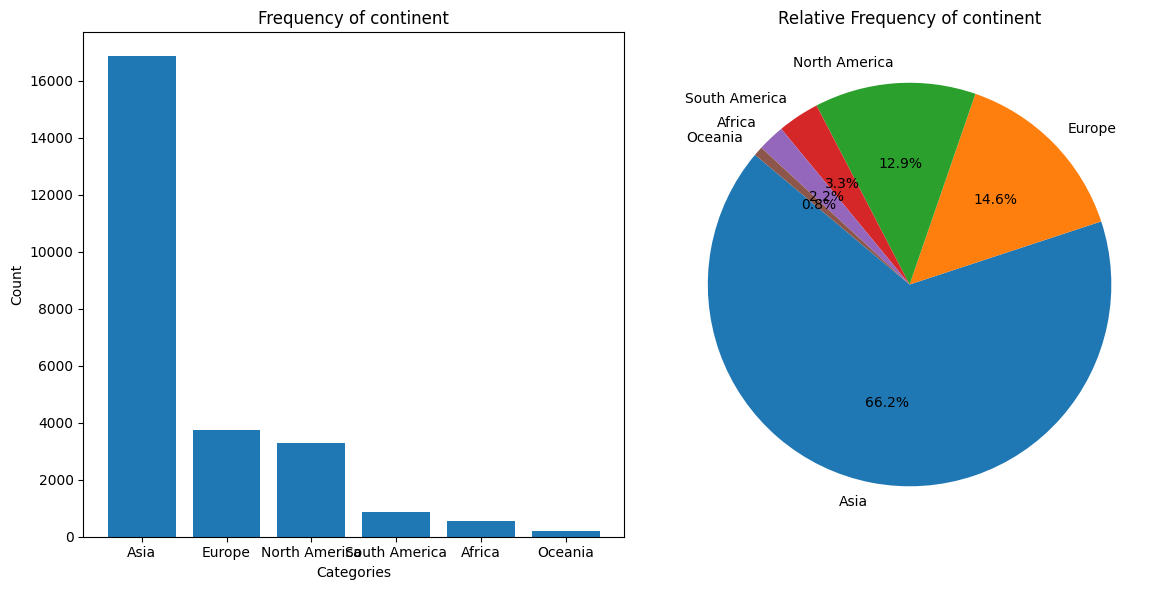

education_of_employee frequency table
+---+-------------+-----------+
|   |    Class    | Frequency |
+---+-------------+-----------+
| 0 | Bachelor's  |   10234   |
| 1 |  Master's   |   9634    |
| 2 | High School |   3420    |
| 3 |  Doctorate  |   2192    |
+---+-------------+-----------+
education_of_employee Relative frequency table
+---+-------------+-----------+----------------------+
|   |    Class    | Frequency | Relative Frequency % |
+---+-------------+-----------+----------------------+
| 0 | Bachelor's  |   10234   |        40.16         |
| 1 |  Master's   |   9634    |        37.81         |
| 2 | High School |   3420    |        13.42         |
| 3 |  Doctorate  |   2192    |         8.6          |
+---+-------------+-----------+----------------------+


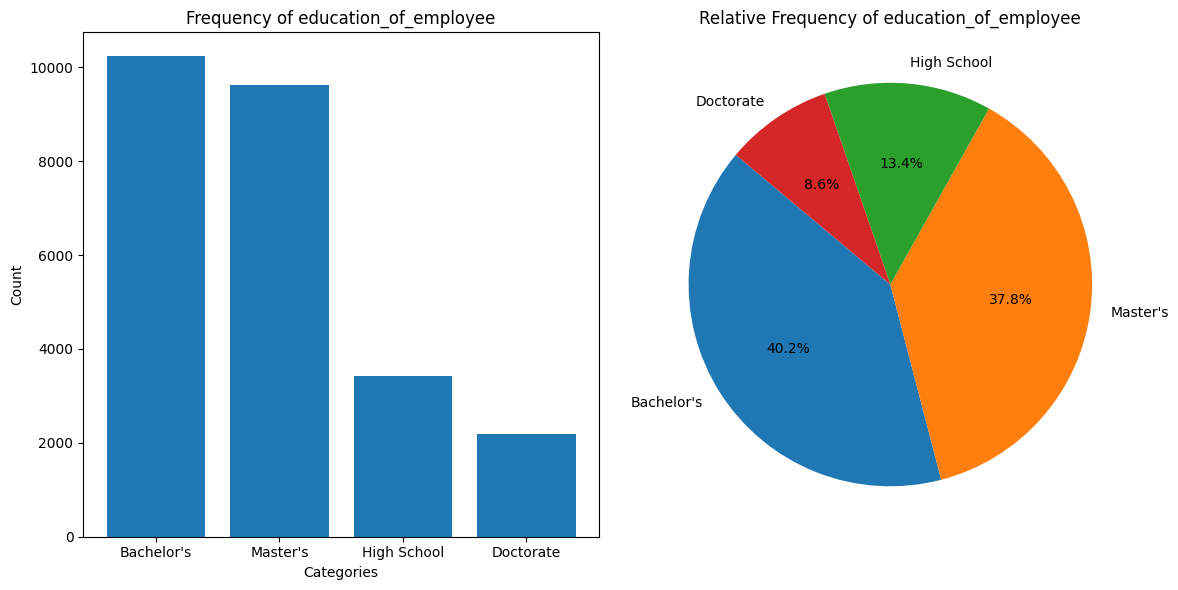

has_job_experience frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |   14802   |
| 1 |   N   |   10678   |
+---+-------+-----------+
has_job_experience Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |   14802   |        58.09         |
| 1 |   N   |   10678   |        41.91         |
+---+-------+-----------+----------------------+


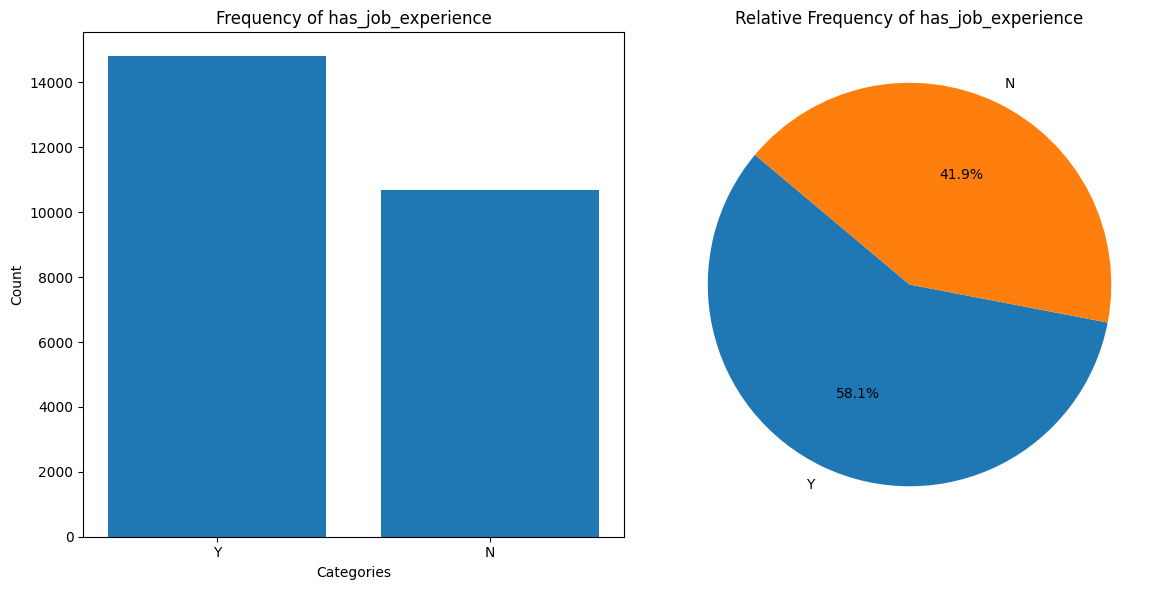

requires_job_training frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   N   |   22525   |
| 1 |   Y   |   2955    |
+---+-------+-----------+
requires_job_training Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   N   |   22525   |         88.4         |
| 1 |   Y   |   2955    |         11.6         |
+---+-------+-----------+----------------------+


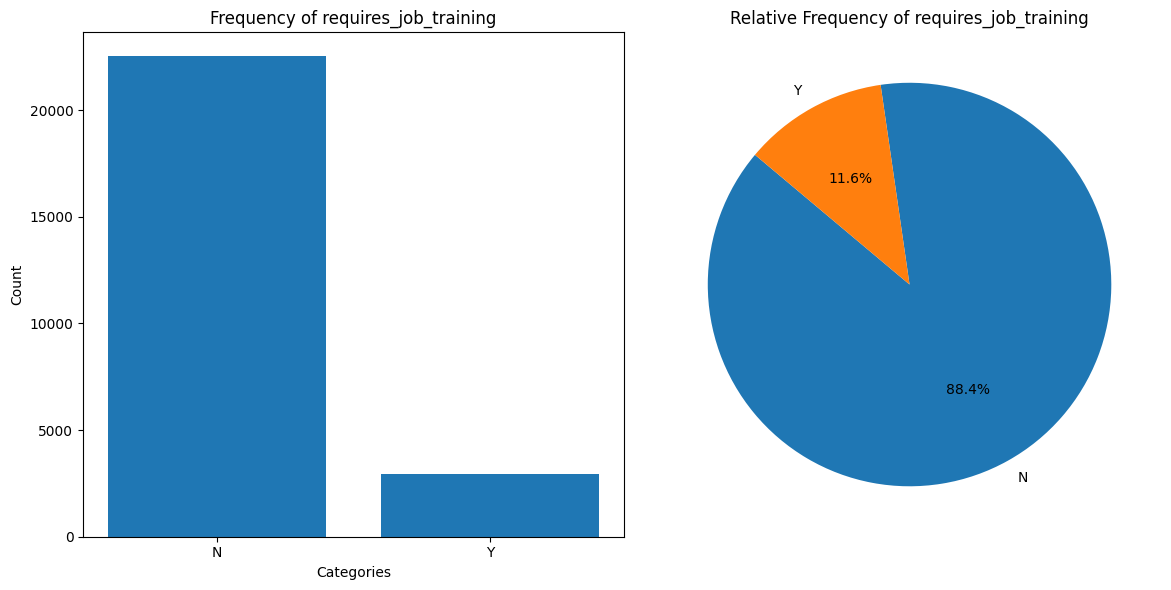

region_of_employment frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 | Northeast |   7195    |
| 1 |   South   |   7017    |
| 2 |   West    |   6586    |
| 3 |  Midwest  |   4307    |
| 4 |  Island   |    375    |
+---+-----------+-----------+
region_of_employment Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 | Northeast |   7195    |        28.24         |
| 1 |   South   |   7017    |        27.54         |
| 2 |   West    |   6586    |        25.85         |
| 3 |  Midwest  |   4307    |         16.9         |
| 4 |  Island   |    375    |         1.47         |
+---+-----------+-----------+----------------------+


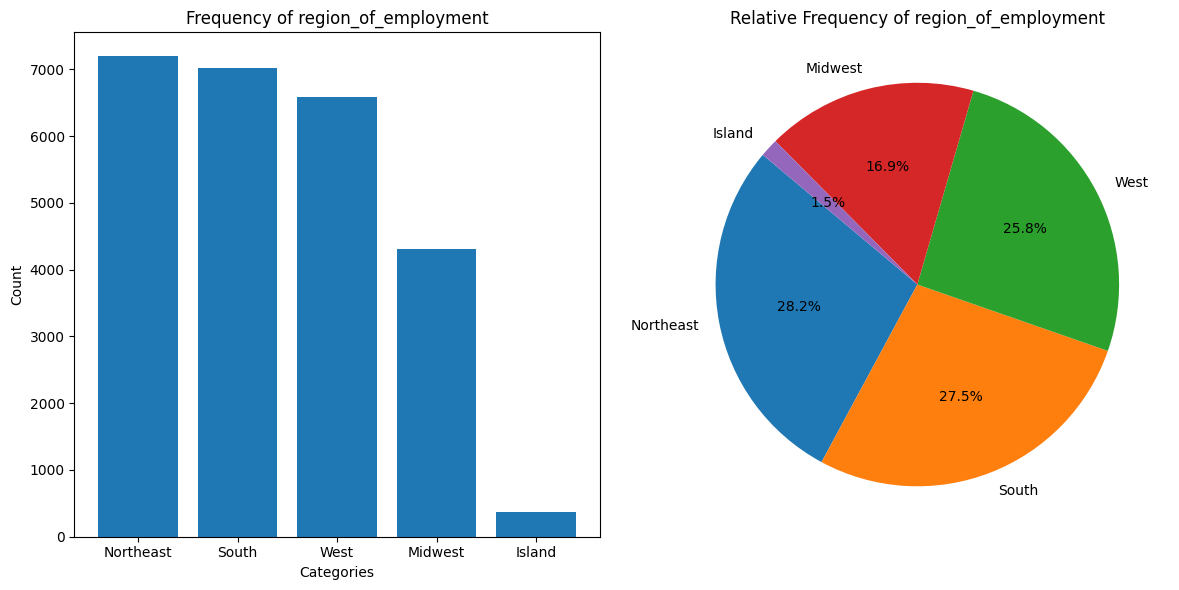

unit_of_wage frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 | Year  |   22962   |
| 1 | Hour  |   2157    |
| 2 | Week  |    272    |
| 3 | Month |    89     |
+---+-------+-----------+
unit_of_wage Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 | Year  |   22962   |        90.12         |
| 1 | Hour  |   2157    |         8.47         |
| 2 | Week  |    272    |         1.07         |
| 3 | Month |    89     |         0.35         |
+---+-------+-----------+----------------------+


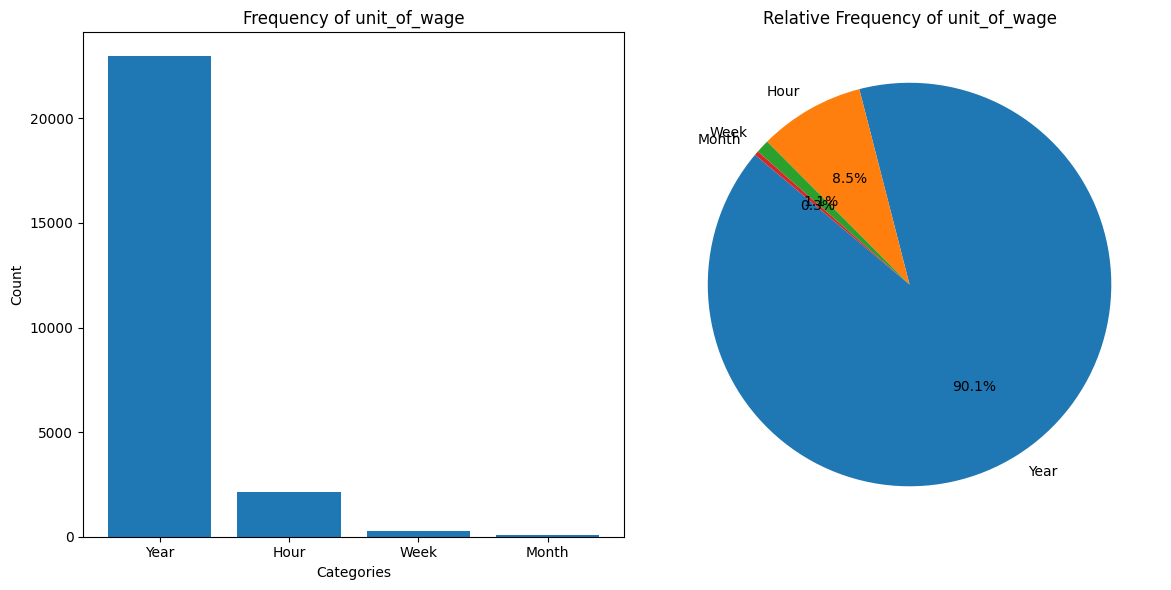

full_time_position frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |   22773   |
| 1 |   N   |   2707    |
+---+-------+-----------+
full_time_position Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |   22773   |        89.38         |
| 1 |   N   |   2707    |        10.62         |
+---+-------+-----------+----------------------+


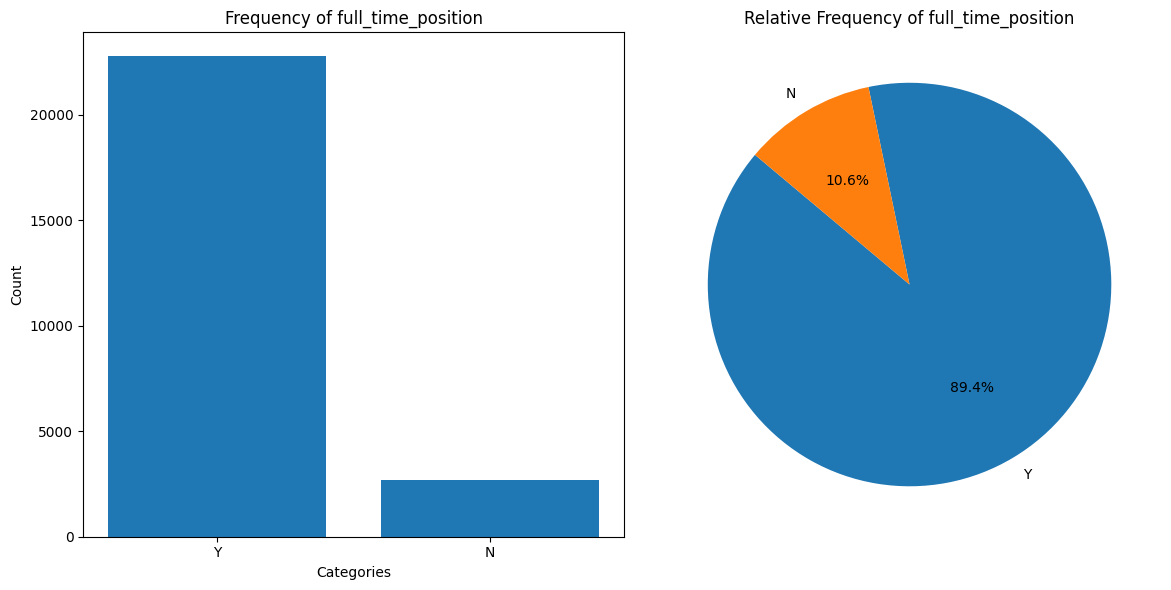

case_status frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 | Certified |   17018   |
| 1 |  Denied   |   8462    |
+---+-----------+-----------+
case_status Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 | Certified |   17018   |        66.79         |
| 1 |  Denied   |   8462    |        33.21         |
+---+-----------+-----------+----------------------+


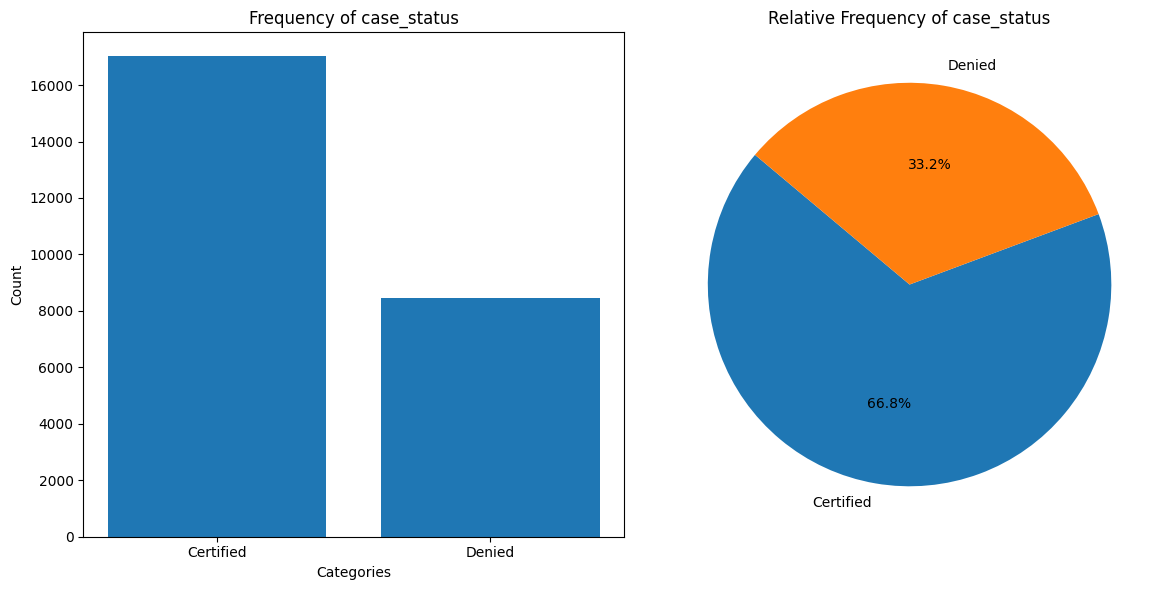

In [13]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(visa_df)

# 6. Handling Missing Values in Numerical Columns

In [14]:
visa_df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [15]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# 7. Numerical - UniVariate - Analysis - Using -Pipeline

In [16]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:

            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()


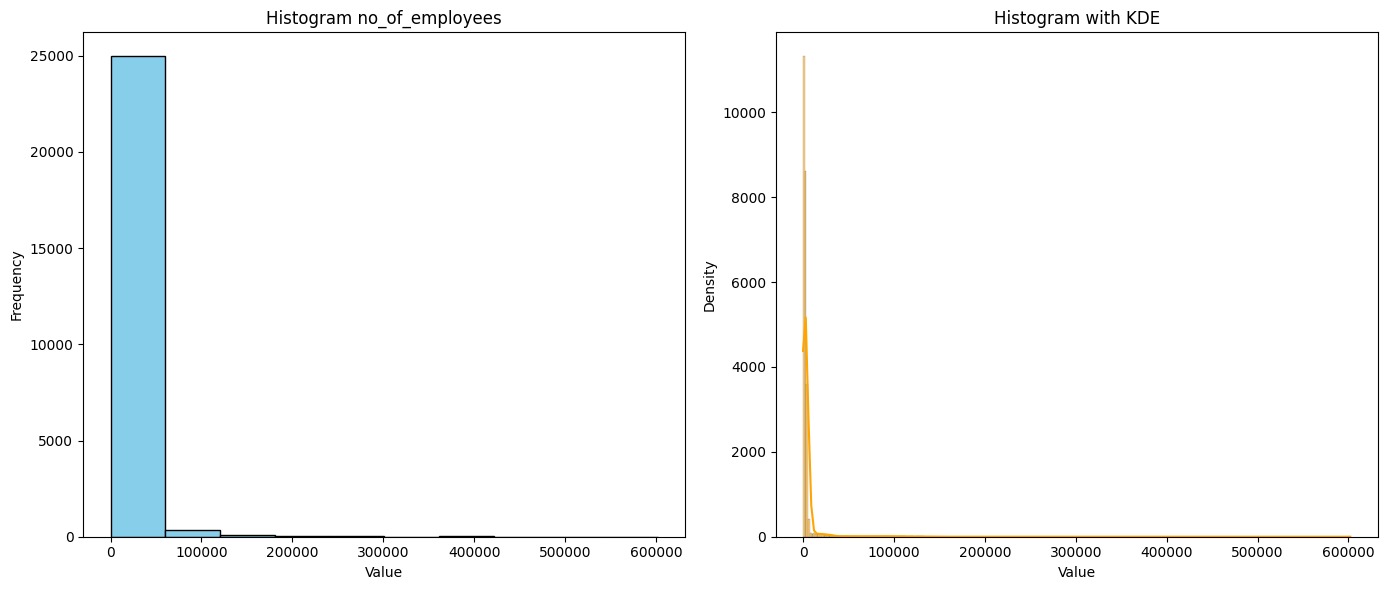

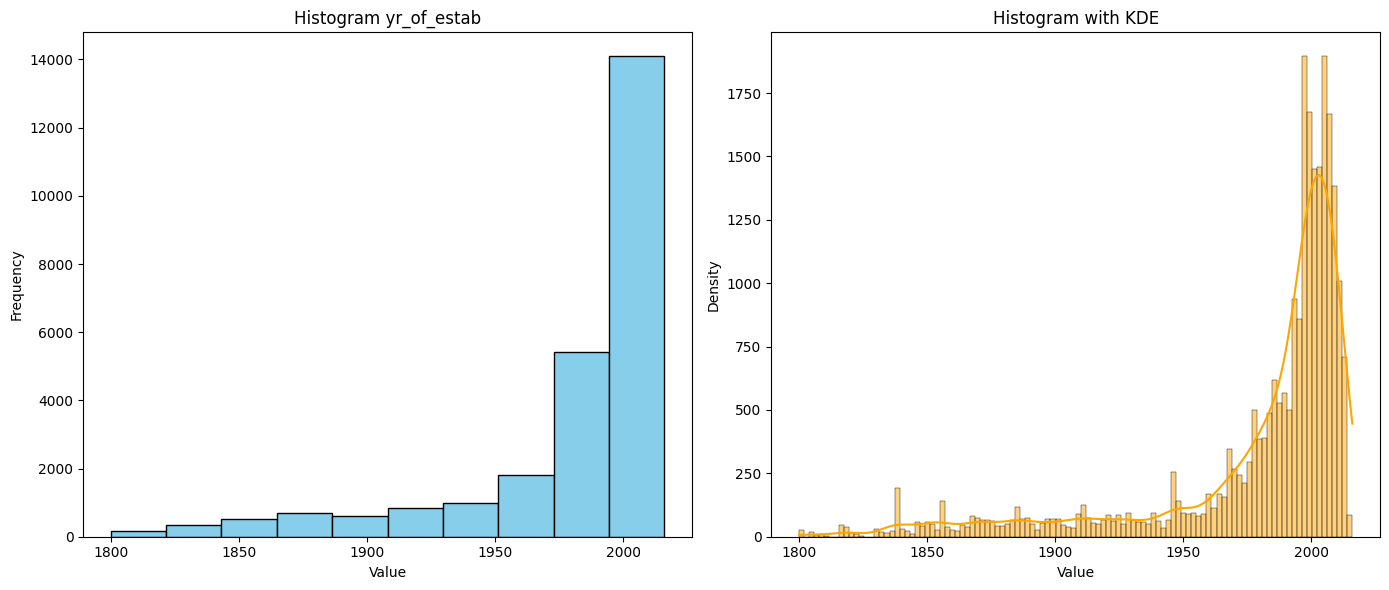

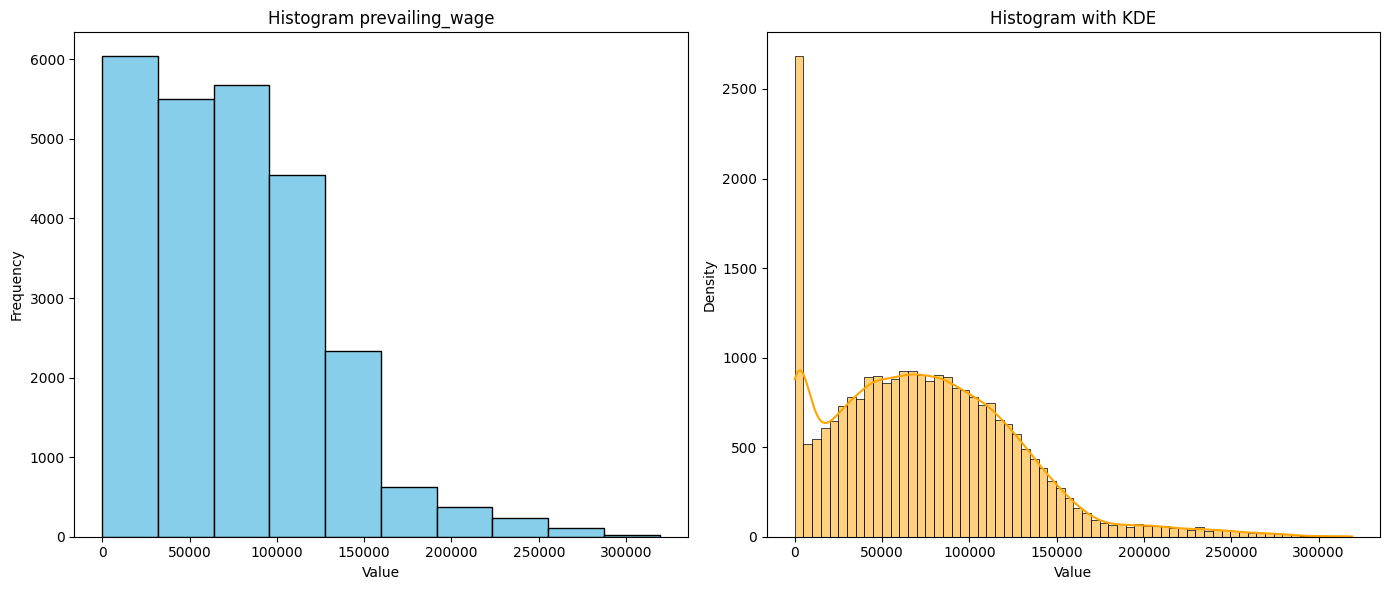

In [17]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(visa_df)

# 8. Numerical - Variables -Outliers Analysis - fillit

# 9. Bi Variate Analyis

## 9.1 cat to target(cat)

In [18]:
cat_vars = visa_df.select_dtypes(include="object").columns
print(cat_vars)

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359
case_status            Certified  Denied
education_of_employee                   
Bachelor's                  6367    3867
Doctorate                   1912     280
High School                 1164    2256
Master's                    7575    2059
case_status         Certified  Denied
has_job_experience                   
N                        5994    4684
Y                       11024    3778
case_status            Certified  Denied
requires_job_training                   
N                          15012    7513
Y                           2006     949
case_status         Certified  Denied
has_job_experience                   
N                        5994    4684
Y                       11024    3778
case_status           

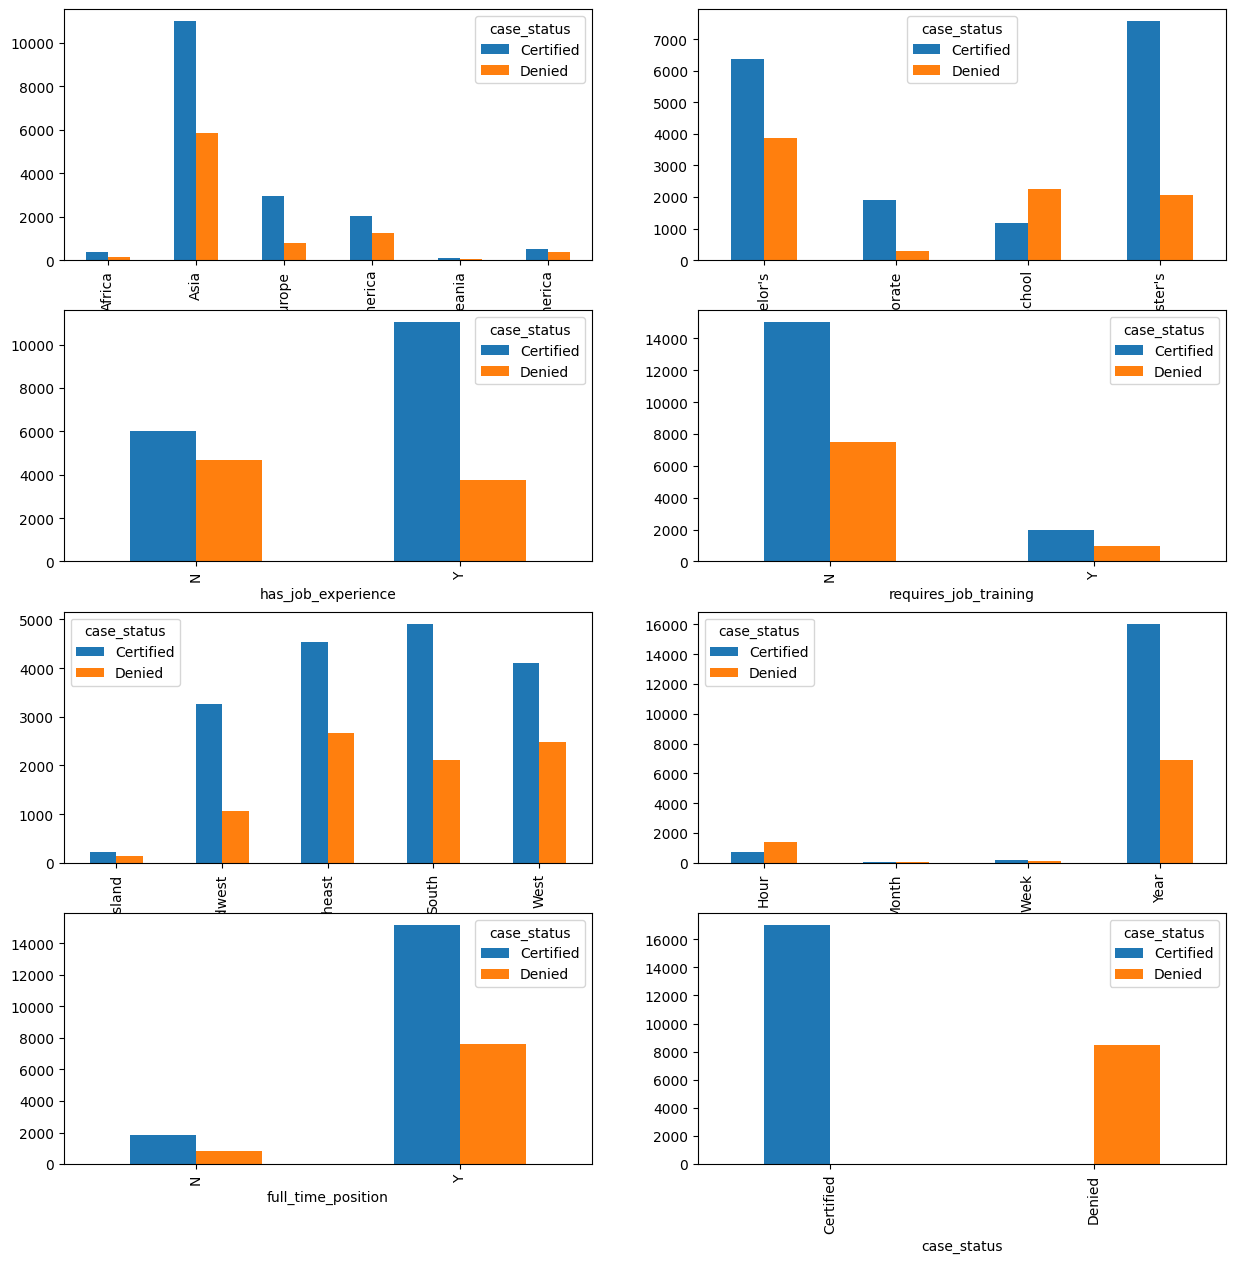

In [19]:
target="case_status"
fig,ax = plt.subplots(4,2,figsize=(15,15))
for axi,x in zip(ax.flat,cat_vars):
    col1=visa_df[x]
    col2=visa_df[target]
    result=pd.crosstab(col1,col2)
    print(result)
    print("===============================")
    result.plot(kind='bar',ax=axi)

## 9.2 Num vs Num

In [20]:
num_cols1 = visa_df.select_dtypes(exclude="object").columns.to_list()
num_cols2 = num_cols1.copy()
num_cols2

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

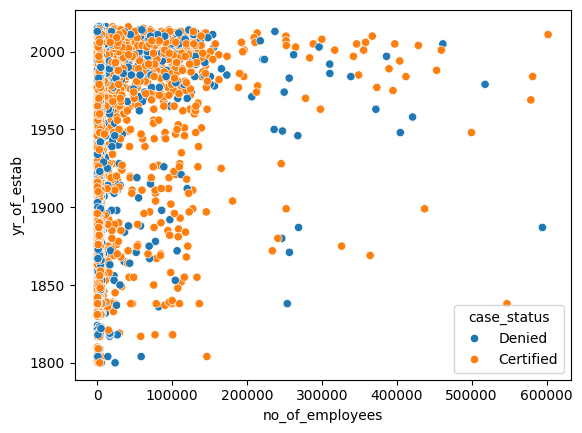

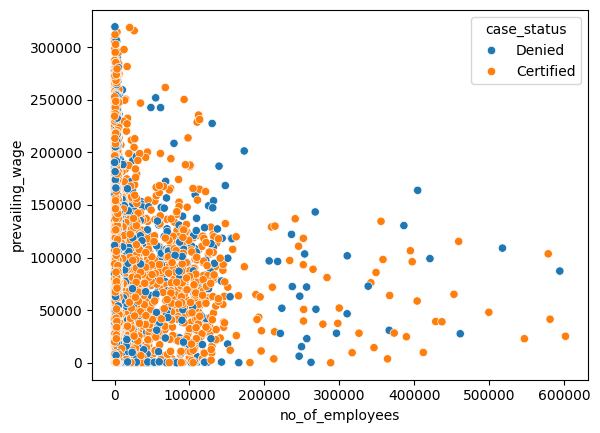

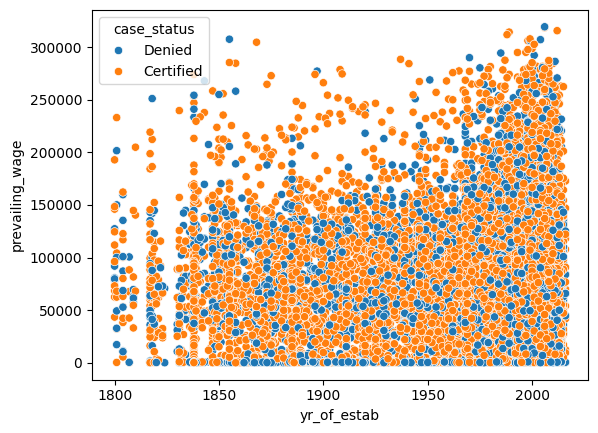

In [21]:
for i in num_cols1:
    for j in num_cols2:
        if i == j:
            pass
        else:
            sns.scatterplot(x=i,y=j,hue=target,data=visa_df)
            plt.show()
    num_cols2.pop(0)

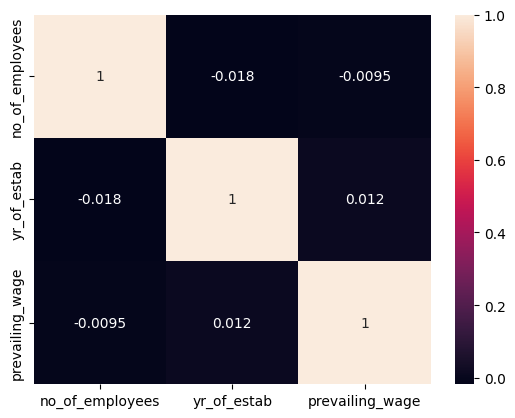

In [22]:
corr_mat=visa_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

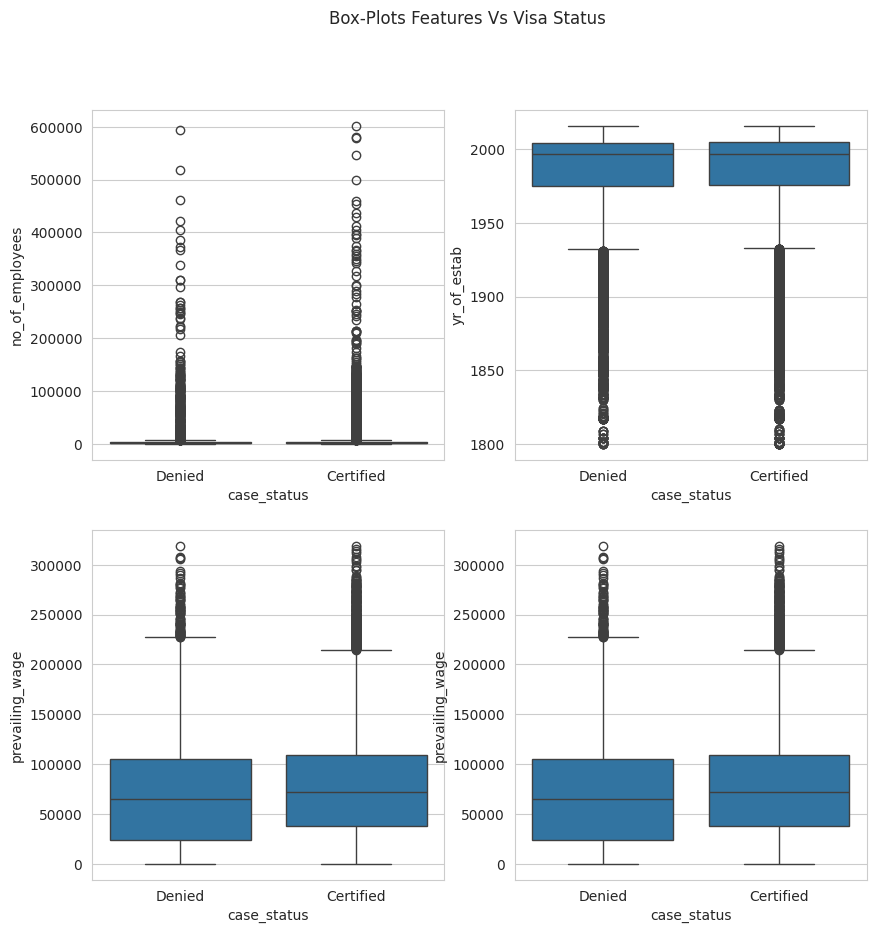

In [23]:
output_var=target
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs Visa Status')
sns.boxplot(ax=axes[0, 0], x=output_var, y='no_of_employees', data=visa_df)
sns.boxplot(ax=axes[0, 1], x=output_var, y='yr_of_estab', data=visa_df)
sns.boxplot(ax=axes[1, 0], x=output_var, y='prevailing_wage', data=visa_df)
sns.boxplot(ax=axes[1, 1], x=output_var, y='prevailing_wage', data=visa_df)
plt.show()

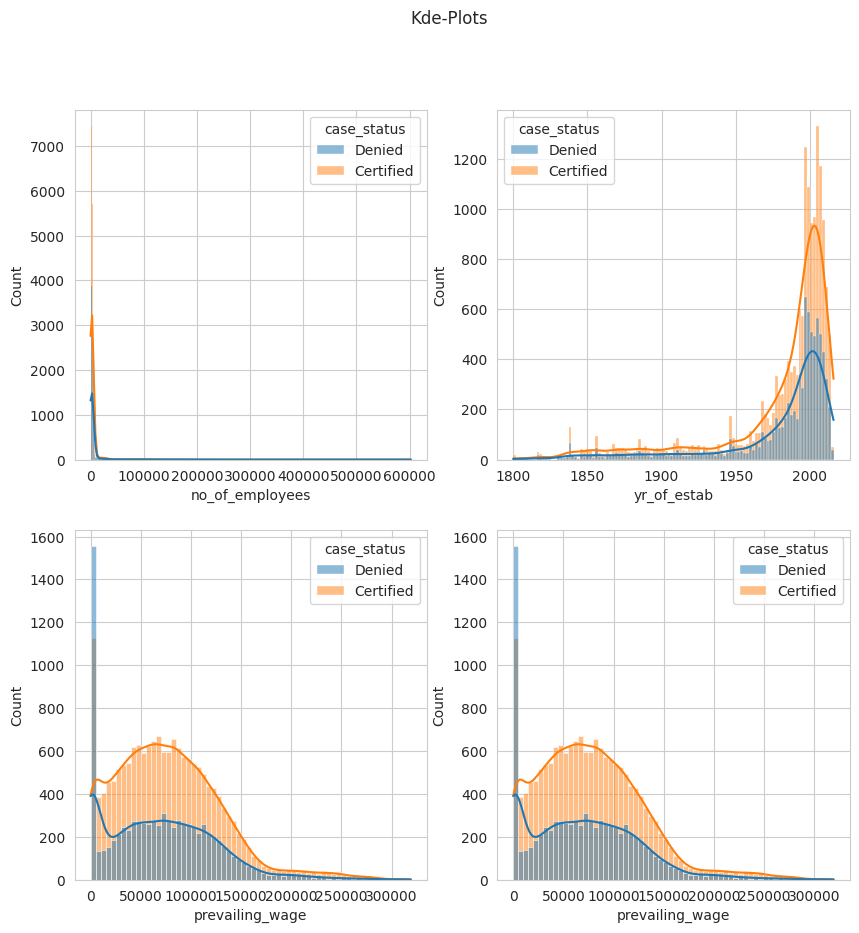

In [24]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0, 0], hue=output_var, x='no_of_employees', data=visa_df,kde=True)
sns.histplot(ax=axes[0, 1], hue=output_var, x='yr_of_estab', data=visa_df,kde=True)
sns.histplot(ax=axes[1, 0], hue=output_var, x='prevailing_wage', data=visa_df,kde=True)
sns.histplot(ax=axes[1, 1], hue=output_var, x='prevailing_wage', data=visa_df,kde=True)
plt.show()

# 10. Data Transformation

In [25]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


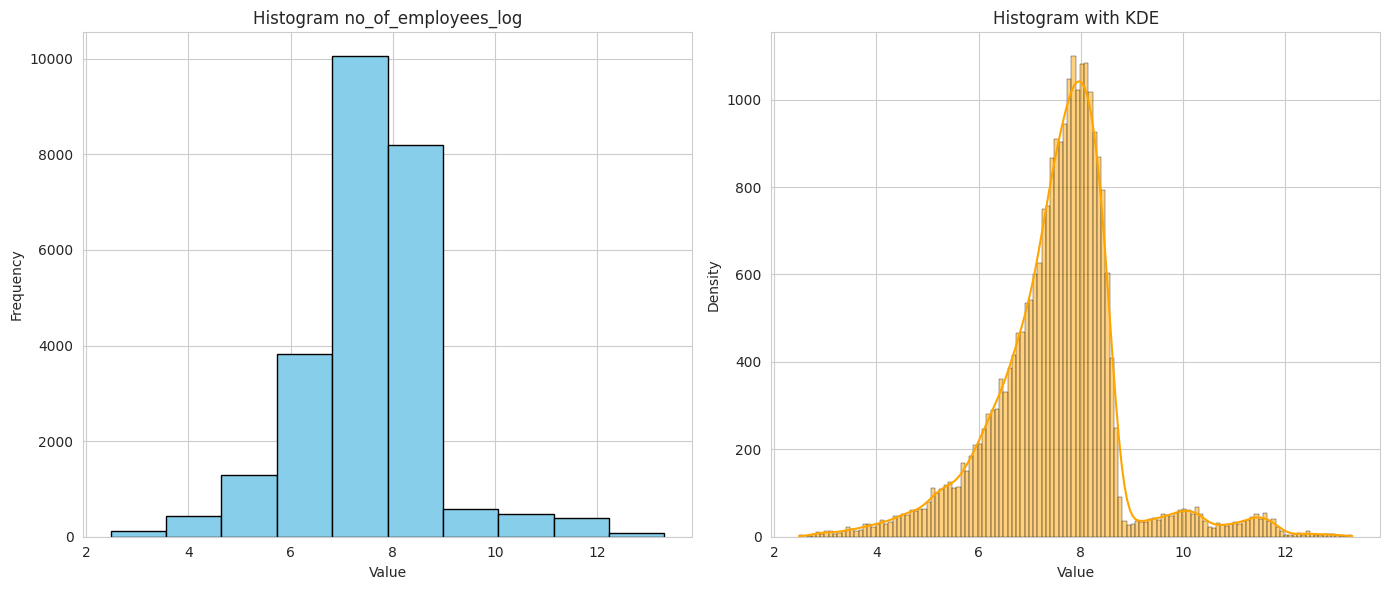

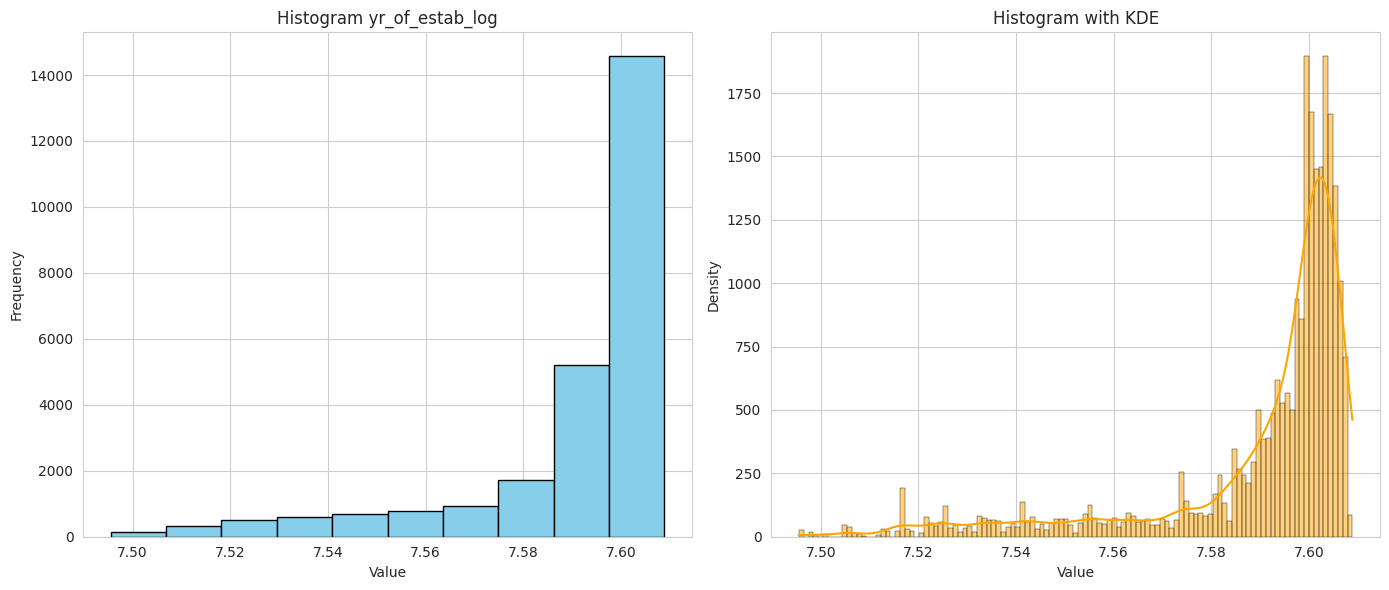

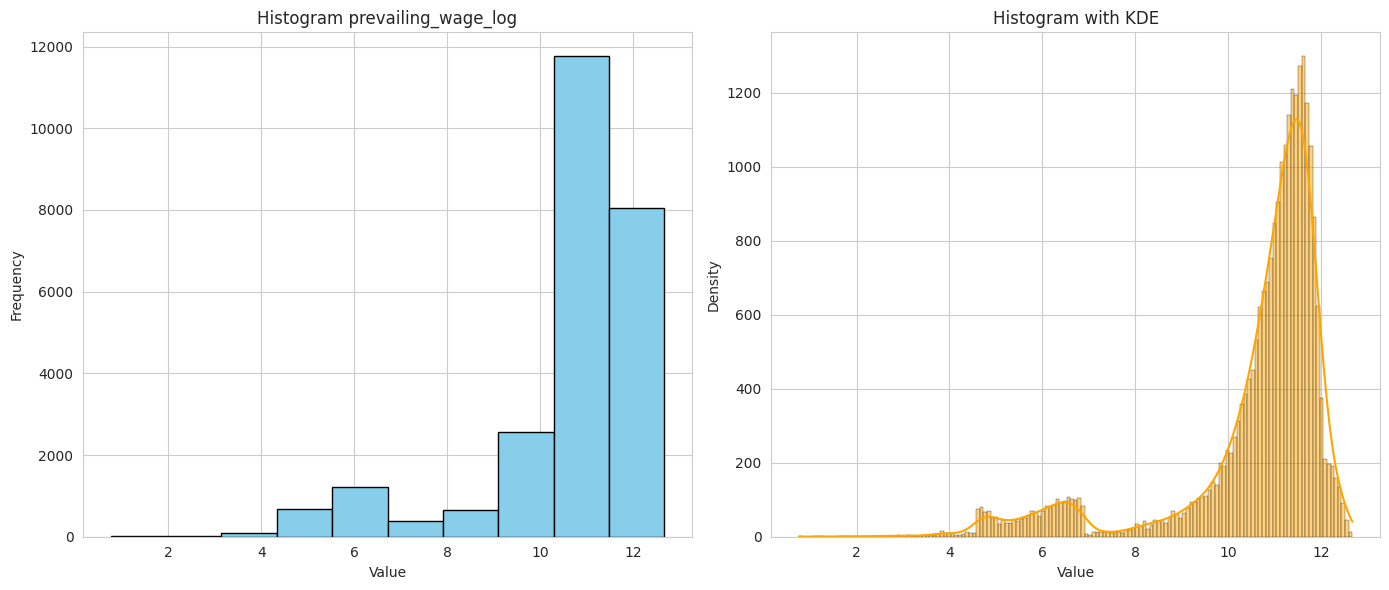

In [26]:
visa_df["no_of_employees_log"]=np.log(visa_df["no_of_employees"])
visa_df["yr_of_estab_log"]=np.log(visa_df["yr_of_estab"])
visa_df["prevailing_wage_log"]=np.log(visa_df["prevailing_wage"])


visa_num_df = visa_df[['no_of_employees_log','yr_of_estab_log', 'prevailing_wage_log']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(visa_num_df)

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


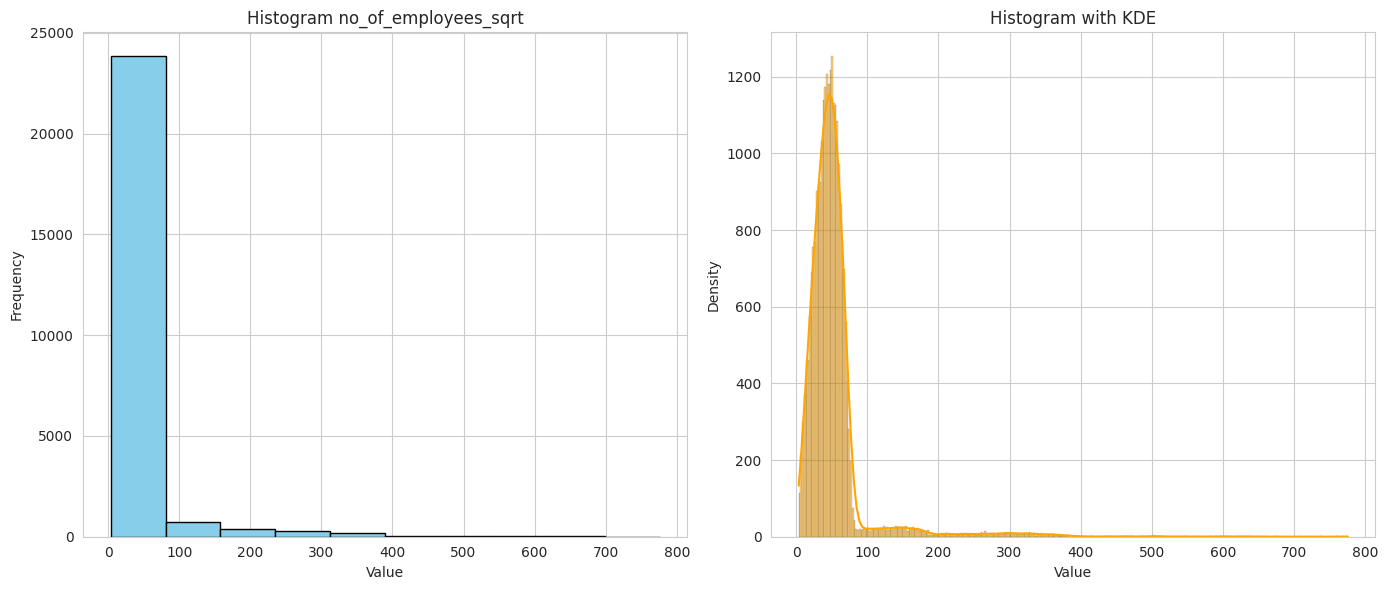

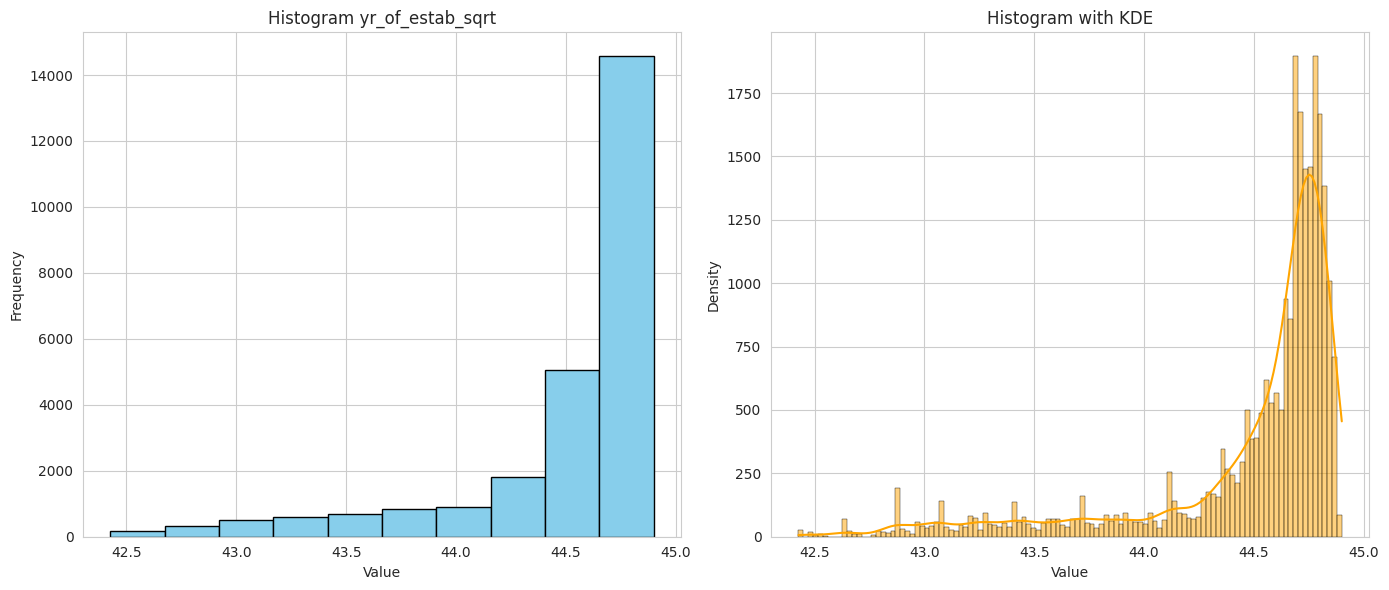

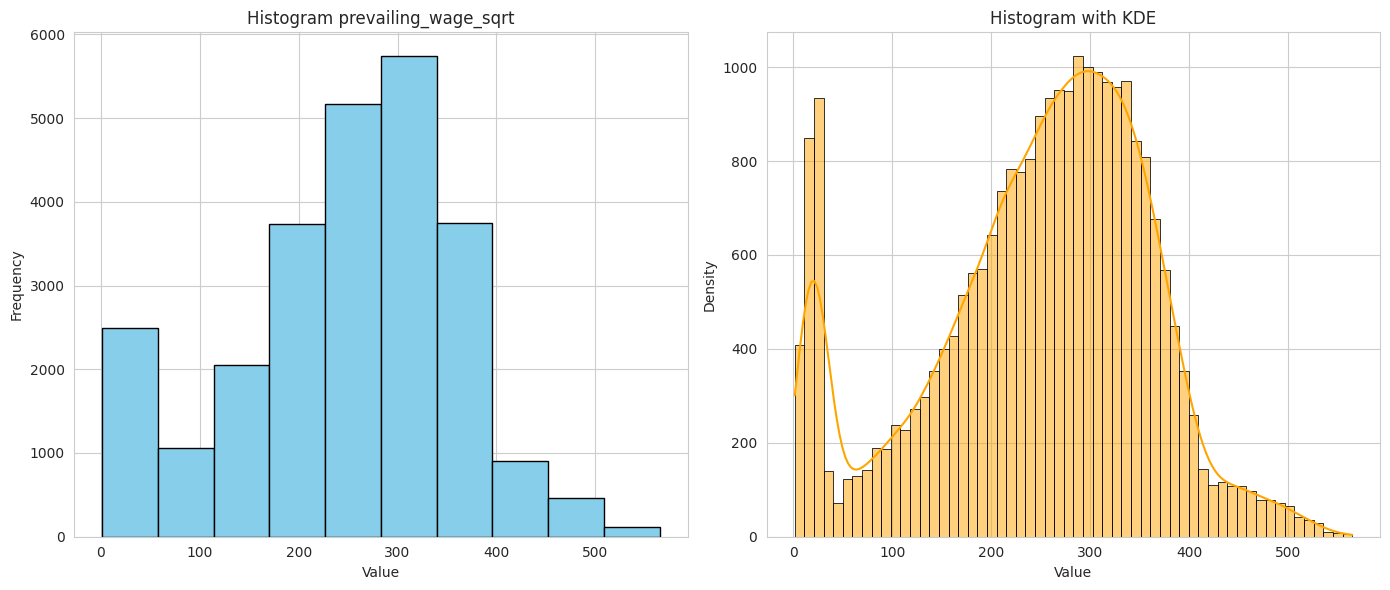

In [27]:
visa_df["no_of_employees_sqrt"]=np.sqrt(visa_df["no_of_employees"])
visa_df["yr_of_estab_sqrt"]=np.sqrt(visa_df["yr_of_estab"])
visa_df["prevailing_wage_sqrt"]=np.sqrt(visa_df["prevailing_wage"])


visa_num_df = visa_df[['no_of_employees_sqrt','yr_of_estab_sqrt', 'prevailing_wage_sqrt']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(visa_num_df)

In [28]:
visa_df["yr_of_estab_reci"]=1/(visa_df["yr_of_estab"])

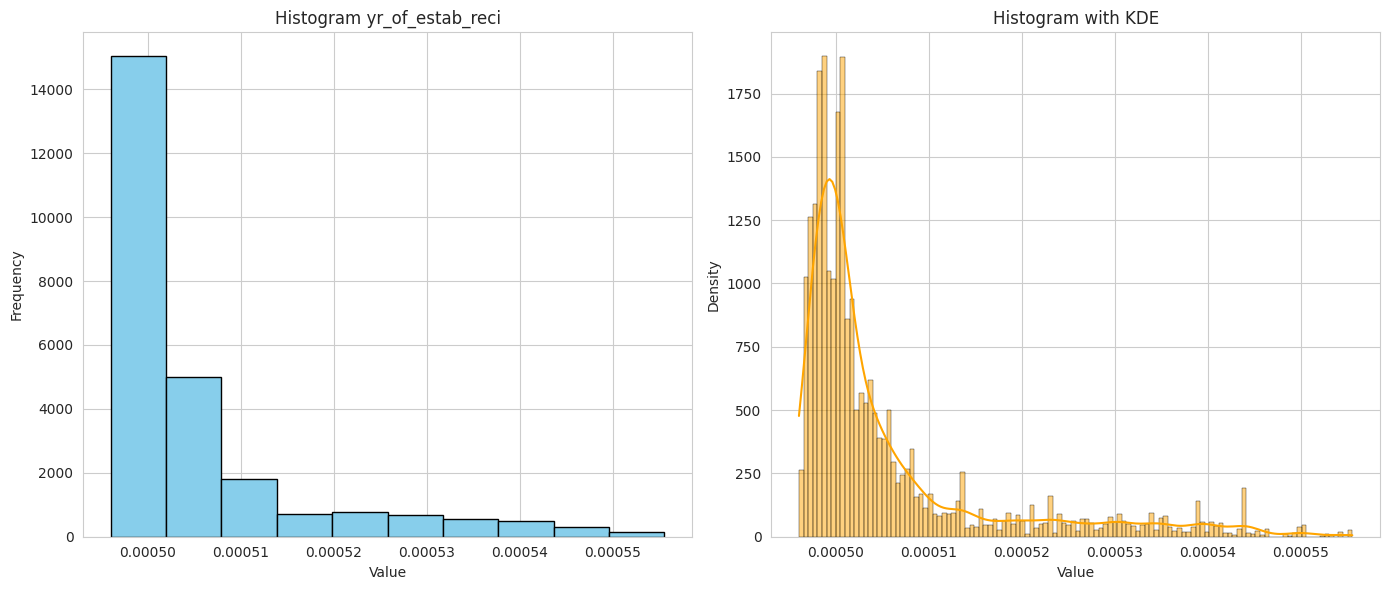

In [29]:
visa_num_df = visa_df[['yr_of_estab_reci']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(visa_num_df)

# 11. Standization - Normalization

In [30]:
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
scaled_columns = scaler.fit_transform(visa_df[['no_of_employees_log','yr_of_estab_log', 'prevailing_wage_sqrt']])

# Replace the original columns with the scaled columns
visa_df[['no_of_employees_log_stand','yr_of_estab_log_stand', 'prevailing_wage_sqrt_stand']] = scaled_columns

print(visa_df)

      continent education_of_employee has_job_experience  \
0          Asia           High School                  N   
1          Asia              Master's                  Y   
2          Asia            Bachelor's                  N   
3          Asia            Bachelor's                  N   
4        Africa              Master's                  Y   
...         ...                   ...                ...   
25475      Asia            Bachelor's                  Y   
25476      Asia           High School                  Y   
25477      Asia              Master's                  Y   
25478      Asia              Master's                  Y   
25479      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                         N             2412         2002   
2                         Y            44444         2008   
3                         N        

# 12. Convert Cat - to - Numerical Columns

In [31]:
cat_vars = visa_df.select_dtypes(include='object').columns
cat_vars

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
for var in cat_vars:
    le = LabelEncoder()
    visa_df[var]=le.fit_transform(visa_df[var])

# 13. SMOTE for Balancing Data

In [33]:
visa_df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'no_of_employees_log',
       'yr_of_estab_log', 'prevailing_wage_log', 'no_of_employees_sqrt',
       'yr_of_estab_sqrt', 'prevailing_wage_sqrt', 'yr_of_estab_reci',
       'no_of_employees_log_stand', 'yr_of_estab_log_stand',
       'prevailing_wage_sqrt_stand'],
      dtype='object')

In [34]:
visa_df.dropna(inplace=True)

In [35]:
Y=visa_df["case_status"]
X=visa_df[[ 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training',
       'region_of_employment', 'unit_of_wage',
       'full_time_position', 'no_of_employees_log_stand', 'yr_of_estab_log_stand',
       'prevailing_wage_sqrt_stand']]
print(len(Y),len(X))
print(X.columns)


25447 25447
Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'no_of_employees_log_stand',
       'yr_of_estab_log_stand', 'prevailing_wage_sqrt_stand'],
      dtype='object')


In [37]:
Y.value_counts()

case_status
0    17001
1     8446
Name: count, dtype: int64

# 14. ML Models

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [38]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

## 14.1 Logistic Regression

## 14.7 GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 0.6854644593997151
Test Accuracy: 0.6783889980353635
              precision    recall  f1-score   support

           0       0.68      0.99      0.80      3359
           1       0.75      0.08      0.15      1731

    accuracy                           0.68      5090
   macro avg       0.71      0.53      0.47      5090
weighted avg       0.70      0.68      0.58      5090

[[3313   46]
 [1591  140]]


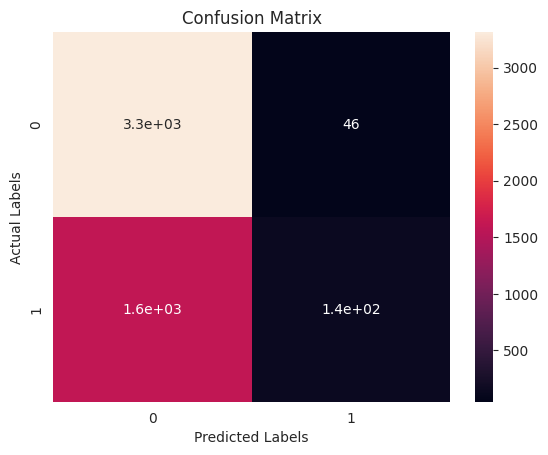

In [43]:
from sklearn.model_selection import train_test_split
# Ensure X and Y are defined before this cell
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, Y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

y_pred = gdb_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## 14.8 XGBClassifier

XGBClassifier Test Accuracy: 0.7306483300589391
GradientBoostingClassifier Test Accuracy: 0.6783889980353635
Saved XGBClassifier as best model.
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3359
           1       0.63      0.50      0.56      1731

    accuracy                           0.73      5090
   macro avg       0.70      0.67      0.68      5090
weighted avg       0.72      0.73      0.72      5090

[[2856  503]
 [ 868  863]]


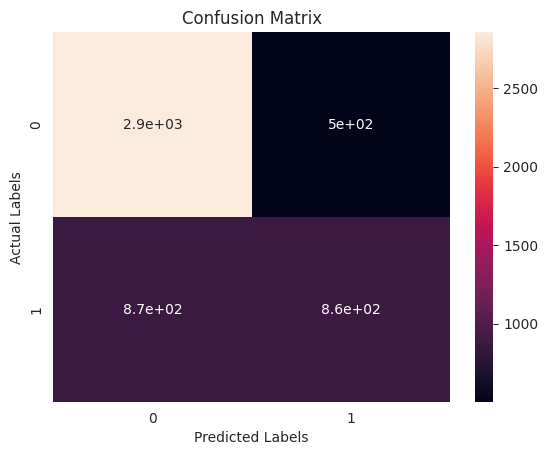

In [44]:
from xgboost import XGBClassifier
import joblib
import pickle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

xgmodel = XGBClassifier()
xgmodel.fit(X_train, Y_train)

gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)

# Evaluate both models
y_pred_xgb = xgmodel.predict(X_test)
xgb_acc = accuracy_score(Y_test, y_pred_xgb)

y_pred_gdb = gdb_clf.predict(X_test)
gdb_acc = accuracy_score(Y_test, y_pred_gdb)

print("XGBClassifier Test Accuracy:", xgb_acc)
print("GradientBoostingClassifier Test Accuracy:", gdb_acc)

# Save the best model and columns
if xgb_acc > gdb_acc:
    joblib.dump(xgmodel, '../models/best_model.pkl')
    print('Saved XGBClassifier as best model.')
    best_acc = xgb_acc
    best_pred = y_pred_xgb
    best_name = 'XGBClassifier'
else:
    joblib.dump(gdb_clf, '../models/best_model.pkl')
    print('Saved GradientBoostingClassifier as best model.')
    best_acc = gdb_acc
    best_pred = y_pred_gdb
    best_name = 'GradientBoostingClassifier'
joblib.dump(list(X.columns), '../models/model_columns.pkl')

# Save model results as pickle for visibility
results = {
    'model': best_name,
    'accuracy': best_acc,
    'classification_report': classification_report(Y_test, best_pred, output_dict=True),
    'confusion_matrix': confusion_matrix(Y_test, best_pred).tolist()
}
with open('../models/model_results.pkl', 'wb') as f:
    pickle.dump(results, f)

# Print classification report and confusion matrix for best model
print(classification_report(Y_test, best_pred))
print(confusion_matrix(Y_test, best_pred))
draw_heatmap(confusion_matrix(Y_test, best_pred))